<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***K-Means Clustering LAB***

$ \ $

***K-means*** is one of the most basic clustering algorithms. It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center. One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand

$ \ $

----

## ***Objetives***

$ \ $

The purpose of this lab  is to learn how to use the unsupervised learning algorithm called ***K-means*** using sklearn. At the end of this lab you will be able to:

* Run a $K$-means algorithm.

* Understand what parameters are customizable for the algorithm.

* Know how to use the inertia curve to determine the optimal number of clusters.

$ \ $ 

----

## ***Installing Required Libraries***

$ \ $

The following required libraries are pre-installed in the Skills Network Labs environment.

In [1]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import requests
from PIL import Image
from io import BytesIO

In [3]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Cluster starting points***

$ \ $

$(1)$ Let's start by creating a simple dataset.

In [4]:
# esta es una función de ayuda que nos permite mostrar datos en 2 dimensiones y resalta los grupos
# X es un arrey de tamaño mx2
# km = KMeans(n_clusters = n, random_state = m)
def display_cluster(X, km = [], num_clusters = 0):

    # describimos el color 
    color = "brgcmyk"

    # si el numero de clusters es cero entonces aplicamos este condicional
    if num_clusters == 0:

        # describimos un scatterplot que nos muestra la relacion entre las dos primeras columnas de X
        col_0 = X[:, 0]
        col_1 = X[:, 1]
        plt.scatter(col_0, col_1, c = color[0], alpha = 0.5, s = 20)

    # en caso de que num_clusters sea mayor que cero, realizamos lo siguiente.
    elif num_clusters > 0:

        #  realizamos una iteracion sobre el conjunto [0,1,....,n-1]
        for i in range(num_clusters):

            # tomamos las columnas 0 y 1, luego tomamos las etiquetas de las columnas que son iguales a i
            mask = (km.labels_ == i)
            plt.scatter(X[mask , 0], X[mask, 1], c = color[i], alpha = 0.5, s = 20)

            # tomamos el i-esimo cluster, luego tomamos sus coordenadas x y y, y realizamos un dibujo del cluster en el plano cartesiano
            cluster_i = km.cluster_centers_[i]
            x = cluster_i[0]
            y = cluster_i[1]
            plt.scatter(x, y, c = color[i], marker = 'x', s = 100)

    # mostramos los plots en pantalla
    return plt.show()

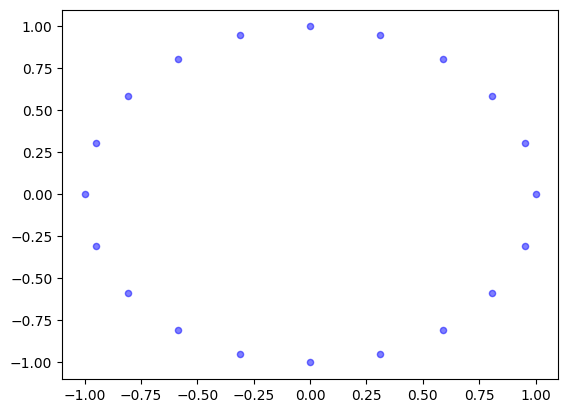

In [5]:
# tomamos 20 puntos entre [0,2pi]
angle = np.linspace(0, 2*np.pi, 20, endpoint = False)

# creamos un conjunto de 20 vectores que satisfacen que x^2+y^2 = 1. Estos vectores quedan descritos en el array X
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

# mostramos nuestra data en un plot
display_cluster(X)

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. Settign a the [Random state](https://numpy.org/doc/stable/reference/random/legacy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#numpy.random.RandomState) variable is useful for testing and allows us to seed the randomness (so we get the same results each time).

$ \ $

$(2)$ Clustering with a random state of $10$.


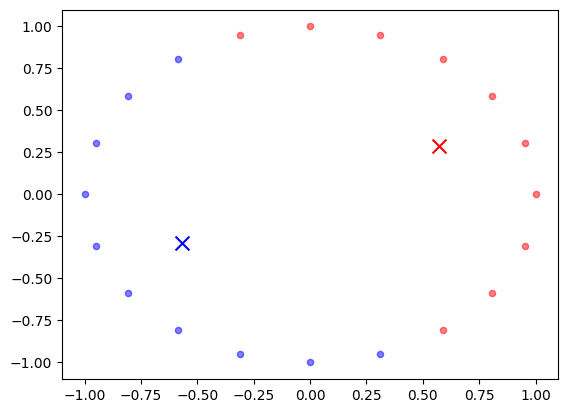

In [6]:
# tomamos 20 puntos entre [0,2pi]
angle = np.linspace(0, 2*np.pi, 20, endpoint = False)

# creamos un conjunto de 20 vectores que satisfacen que x^2+y^2 = 1. Estos vectores quedan descritos en el array X
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

# cremaos un objeto de tipo KMeans con 2 clusters
km = KMeans(n_clusters = 2, random_state = 10, n_init = 1) 

# entrenamos nuestro modelo
km.fit(X)

# mostramos nuestra data en un plot
display_cluster(X, km, 2)

$ \ $

$(3)$ Clustering with a random state of $20$.

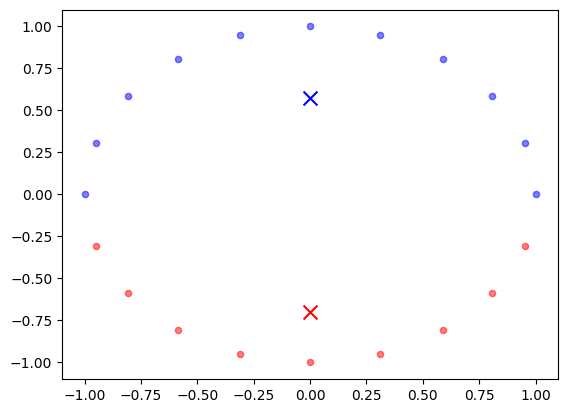

In [7]:
# tomamos 20 puntos entre [0,2pi]
angle = np.linspace(0, 2*np.pi, 20, endpoint = False)

# creamos un conjunto de 20 vectores (x,y) que satisfacen que x^2+y^2 = 1. Estos vectores quedan descritos en el array X de tamaño mx2
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

# cremaos un objeto de tipo KMeans con 2 clusters
km = KMeans(n_clusters = 2, random_state = 20, n_init = 1) 

# entrenamos nuestro modelo
km.fit(X)

# mostramos nuestra data en un plot
display_cluster(X, km, 2)

$ \ $

----

## ***Question***

$ \ $

Why are the clusters different when we run the $K$-means twice? 

$ \ $

$\underline{\text{Answer:}}$ It's because the starting points of the cluster centers have an impact on where the final clusters lie. The starting point of the clusters is controlled by the random state.

$ \ $

----

## ***Determining optimium number of clusters***

$ \ $

$(1)$ Let's create a new dataset that visually consists on a few clusters and try to group them.

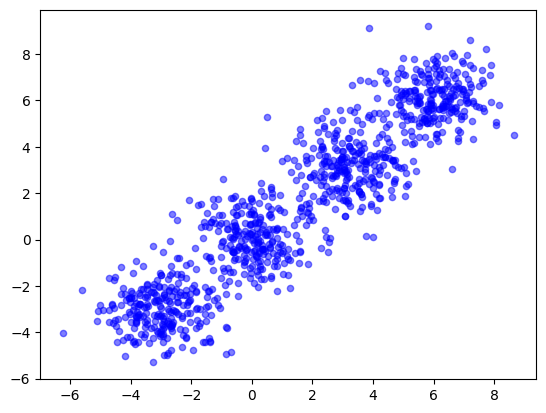

In [8]:
# creamos una coleccion de 4 puntos en el plano
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]

# La función make_blobs() se puede utilizar para generar blobs de puntos con una distribución gaussiana. Puede controlar cuántos blobs generar y la cantidad de muestras generar, así como una gran cantidad de otras propiedades.
# Los BLOB son elementos utilizados en las bases de datos para almacenar datos de gran tamaño que cambian de forma dinámica. 
X, y = make_blobs(n_samples = 1000, n_features = 2, cluster_std = 1, centers = centers, shuffle = False, random_state = 42)

# mostramos los datos sin poner clusters
display_cluster(X)

$ \ $

$(2)$ Let's run $K$-means with seven clusters.

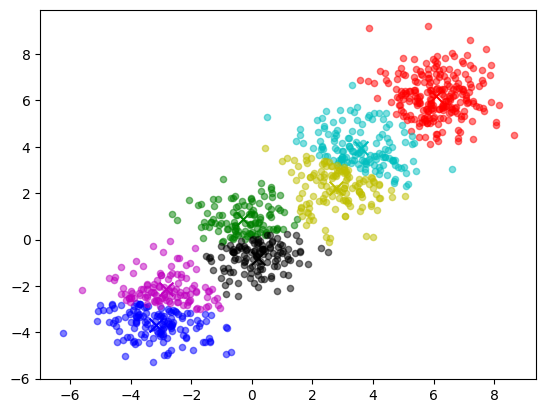

In [9]:
# creamos una coleccion de 4 puntos en el plano
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]

# La función make_blobs() se puede utilizar para generar blobs de puntos con una distribución gaussiana. Puede controlar cuántos blobs generar y la cantidad de muestras generar, así como una gran cantidad de otras propiedades.
# Los BLOB son elementos utilizados en las bases de datos para almacenar datos de gran tamaño que cambian de forma dinámica. 
X, y = make_blobs(n_samples = 1000, n_features = 2, cluster_std = 1, centers = centers, shuffle = False, random_state = 42)

# creamos un objeto KMeans con 7 clusters
km = KMeans(n_clusters = 7)

# entrenamos nuestro modelo
km.fit(X)

# mostramos en pantalla los puntos de X descritos en diferentes clusters
display_cluster(X, km, 7)

$ \ $

$(3)$ Now let's re-run the algorithm with four clusters.

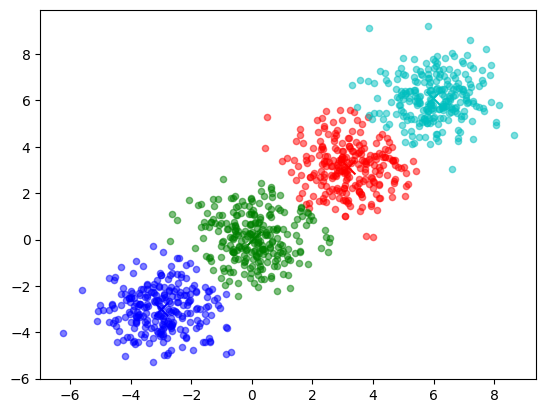

In [10]:
# creamos una coleccion de 4 puntos en el plano
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]

# La función make_blobs() se puede utilizar para generar blobs de puntos con una distribución gaussiana. Puede controlar cuántos blobs generar y la cantidad de muestras generar, así como una gran cantidad de otras propiedades.
# Los BLOB son elementos utilizados en las bases de datos para almacenar datos de gran tamaño que cambian de forma dinámica. 
X, y = make_blobs(n_samples = 1000, n_features = 2, cluster_std = 1, centers = centers, shuffle = False, random_state = 42)
 
# creamos un objeto KMeans con 4 clusters
km = KMeans(n_clusters = 4)

# entrenamos nuestro modelo
km.fit(X)

# mostramos en pantalla los puntos de X descritos en diferentes clusters
display_cluster(X, km, 4)

$ \ $

----

## ***Remark (previous examples)***


$(\checkmark)$ In this case it may be visually obvious that four clusters is better than seven.  

$(\checkmark)$ This is because we can easily view the data in two dimensional space. 

$(\checkmark)$ However, real world data usually has more than two dimensions.  


$(\checkmark)$ A dataset with a higher dimensional space is hard to visualize.


$(\checkmark)$ A way of solving this is to plot the **inertia**. Inertia measures how well a dataset was clustered by $K$-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster 



In [11]:
km.inertia_

1880.174402277564

$ \ $ 

----

## ***Problem $(1)$***

$ \ $

Write code that calculates the inertia for $1$ to $10$ clusters, and plot the inertia as a function of the number of clusters.

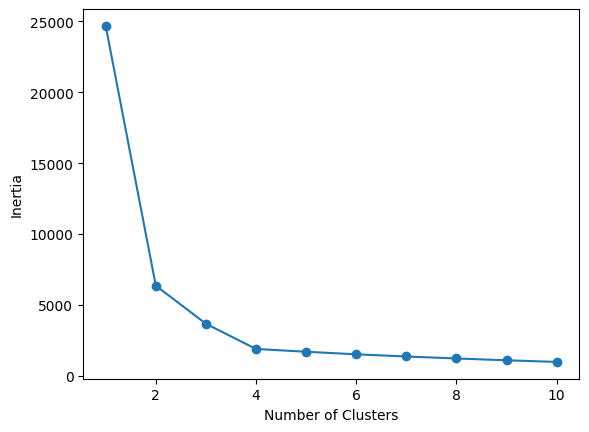

In [12]:
# creamos una lista vacia
inertia = []

# creamos una lista con los numeros enteros del 1 al 10
list_num_clusters = list(range(1, 11))

# realizamos una iteracion sobre la lista anterior
for n in list_num_clusters:

    # creamos un objeto de tipo KMeans con n clusters
    km = KMeans(n_clusters = n)

    # entrenamos nuestro modelo
    km.fit(X)

    # pegamos el valor de inercia dado por km.inertia_ ----------> tener en cuenta que esto depende de n
    inertia.append(km.inertia_)
    
# realizamos un plot (x,y) con
x = list_num_clusters
y = inertia
plt.plot(x,y)

# realizamos un scatter plot (x,y) con
x = list_num_clusters
y = inertia
plt.scatter(x, y)

# describimos la etiqueta del eje x
plt.xlabel('Number of Clusters')

# describimos la etiqueta del eje y
plt.ylabel('Inertia');

$ \ $ 

---

## ***Clustering Colors from an Image***

$ \ $

$(1)$ Let's start by loading the following image.

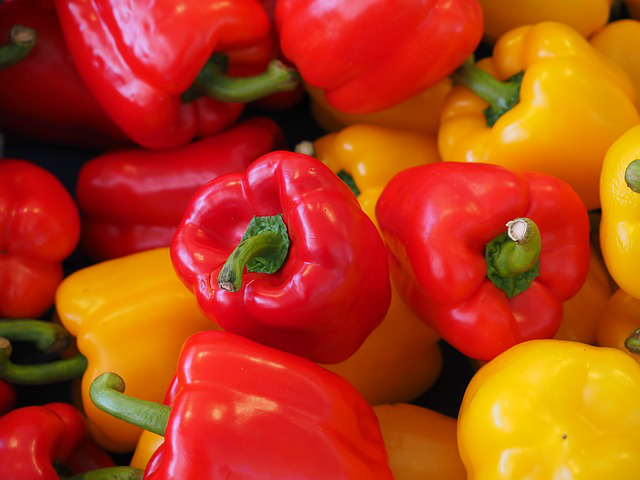

In [13]:
# describimos la url de la imagen
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg'

# esta funcion obtiene el contenido de la url
response = requests.get(url)

# Image.open abre e identifica el archivo de imagen dado
# BytesIO es una clase en el módulo 'Io' de Python que proporciona una interfaz similar a un archivo para flujos de bytes en memoria
img = Image.open(BytesIO(response.content))

# mostramos la imagen en pantalla
img

In [14]:
# convertimos nuestra imagen en un array
img = np.array(img)

# mostramos el tamaño de la imagen
img.shape

(480, 640, 3)

The image above has $480$ pixels in height and $640$ pixels in width. Each pixel has $3$ values that represent how much $\color{aquamarine}{\text{red, green and blue}}$ it has. Below you can play with different combinations of $RGB$ to create different colors. In total, you can create  $256^{3}=16, 777.216$  unique colors.

$ \ $

$(2)$ Assign values for the $RGB$. Each value should be between $0$ and $255$.

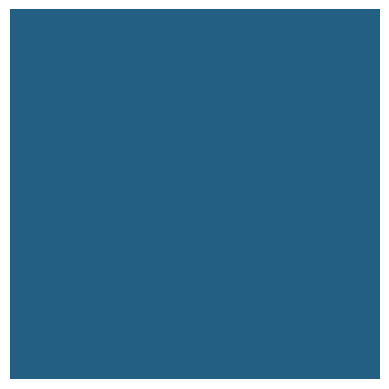

In [15]:
# describimos las tonalidades de los colores rojo, verde y azul
R = 35
G = 95
B = 131

# describimos los valores R,G,B
valores = [np.array([R, G, B]).astype('int')]

# realizamos un plot que muestre el unico valor pasado 
plt.imshow([valores])

# mostramos la imagen sin ejes
plt.axis('off');

$ \ $

$(3)$ First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.

In [16]:
# remodelamos el tamaño de img para que sea de la forma mx3
img_flat = img.reshape(-1, 3)

# mostramos los primeros 5 renglones
img_flat[:5, :]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

$ \ $

$(4)$ Since there are $480 \times 640$ pixels we get $307,200$ rows.


In [17]:
img_flat.shape

(307200, 3)

$ \ $

$(5)$ Let's run K-means with $8$ clusters.

In [18]:
# creamos un objeto de tipo KMeans con 8 clusters
km = KMeans(n_clusters = 8, random_state = 0)

# entrenamos nuestro modelo
km.fit(img_flat)

KMeans(random_state=0)

$ \ $

$(6)$ Now let's replace each row with its closest cluster center.

In [19]:
# realizamos una copia de img_flat
img_flat2 = img_flat.copy()

# tomamos la lista de valores unicos de las etiquetas km
lista = np.unique(km.labels_)

# realizamos una iteracion sobre la lista anterior
for i in lista:

    # creamos una mascara que muestra cuando una etiqueta toma el valor de i
    mask = (km.labels_ == i)

    # cambiamos los valores de los renglones descritos en mask de array img_flat2 por el i-esimo centro del correspondiente cluster
    img_flat2[mask, :] = km.cluster_centers_[i]


$ \ $

$(7)$ We now need to reshape the data from $(307,200 \times 3)$ $-------->$ $(480 \times 640 \times 3)$.

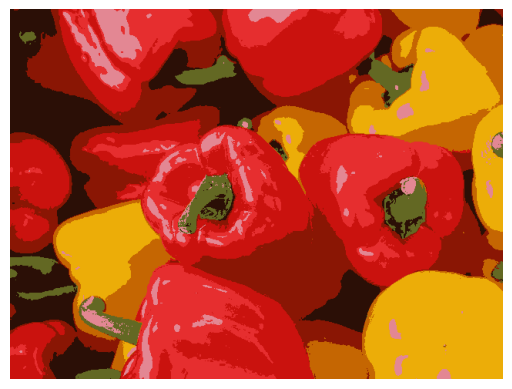

In [20]:
# remodelamos el tamaño de la imagen img_flat2 (307,200×3) −−−−−−−−>  (480×640×3)
img2 = img_flat2.reshape(img.shape)

# mostramos el plot de img2 en pantalla
plt.imshow(img2)

# quitamos los ejes del plot
plt.axis('off');

$ \ $

----

## ***Problem $(2)$***

$ \ $

Write a function that receives the image and number $k$ of clusters, and returns:

* the image quantized into $k$ colors,

* the inertia.

In [21]:
def image_cluster(img, k):

    # remodelamos el tamaño de la imagen dada
    dim = img.shape[0]*img.shape[1]
    profundidad = 3
    img_flat = img.reshape(dim, profundidad)

    # creamos un objeto de tipo KMeans con k clusters
    kmeans = KMeans(n_clusters = k, random_state = 0)

    # entrenamos nuestro modelo con la imagen remodelada
    kmeans.fit(img_flat)

    # realizamos una copia de la imagen remodelada
    img_flat2 = img_flat.copy()

    # creamos una lista que muestra los unicos valores de las etiquetas de kmeans
    lista = np.unique(kmeans.labels_)

    # creamos una iteracion sobre la lista de valores uniques de las etiquetas de kmeans
    for i in lista:

        # creamos una mascara en las etiquetas, la cual nos especifica cuando una etiqueta toma el valor de i
        mask = (kmeans.labels_ == i)

        # tomamos la imagen img_flat2 y describimos los valores de la mascara como el i-esimo centro del correspondiente cluster
        img_flat2[mask, :] = kmeans.cluster_centers_[i]
        
    # tomamos la imagen img_flat2 y remodelamos su tamaño para que sea igual al tamaño original de la imagen dada como parametro de la funcion
    img2 = img_flat2.reshape(img.shape)

    # la funcion devuelve como resultado la imagen img2 y la inercia
    return img2, kmeans.inertia_
    

$ \ $

----

## ***Problem $(3)$***

$ \ $

Call the previous function for $k$ an even numer between $2$ and $20$, and draw an inertia curve. 

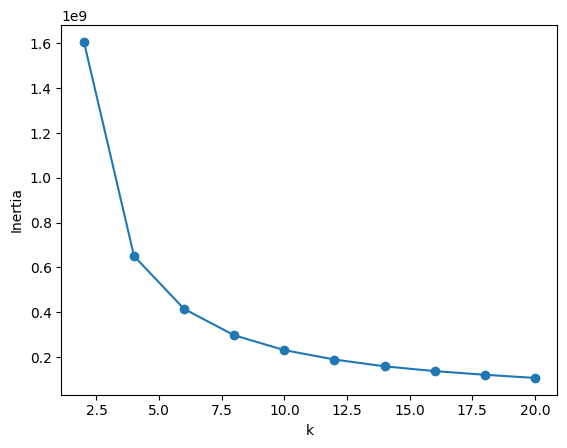

In [22]:
# describimos una lista con los numeros pares 2,4,6,8,...,20
k_vals = list(range(2, 21, 2))

# creamos una lista vacia
img_list = []

# creamos una lista vacia
inertia = []

# realizamos una iteracion sobre la lista inicial
for k in k_vals:

    # usamos la funcion del problema 2 ------> tomando la imagen original img como parametro y el numero k de la iteracion
    img2, ine = image_cluster(img, k)

    # pegamos la imagen img2 a la lista creada anteriormente, la cual sera una lista de imagenes
    img_list.append(img2)

    # pegamos el valor inercial ine a la lista creada anteriormente, la cual sera una lista de valores inerciales
    inertia.append(ine)  

# realizamos un plot (x,y) en el plano cartesiano, donde:
# x = k_vals
# y = inertia
plt.plot(k_vals, inertia)

# realizamos un scAtterplot (x,y) en el plano cartesiano, donde:
# x = k_vals
# y = inertia
plt.scatter(k_vals, inertia)

# describimos la etiqueta del eje x
plt.xlabel('k')

# describimos la etiqueta del eje y
plt.ylabel('Inertia');

Sometimes, the elbow method does not yield a clear decision (for example, if the elbow is not clear and sharp, or is ambiguous).  In such cases, alternatives such as the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) can be helpful.


$ \ $

----

## ***Problem $(4)$***

$ \ $

Plot in a grid all the images for the different k values.

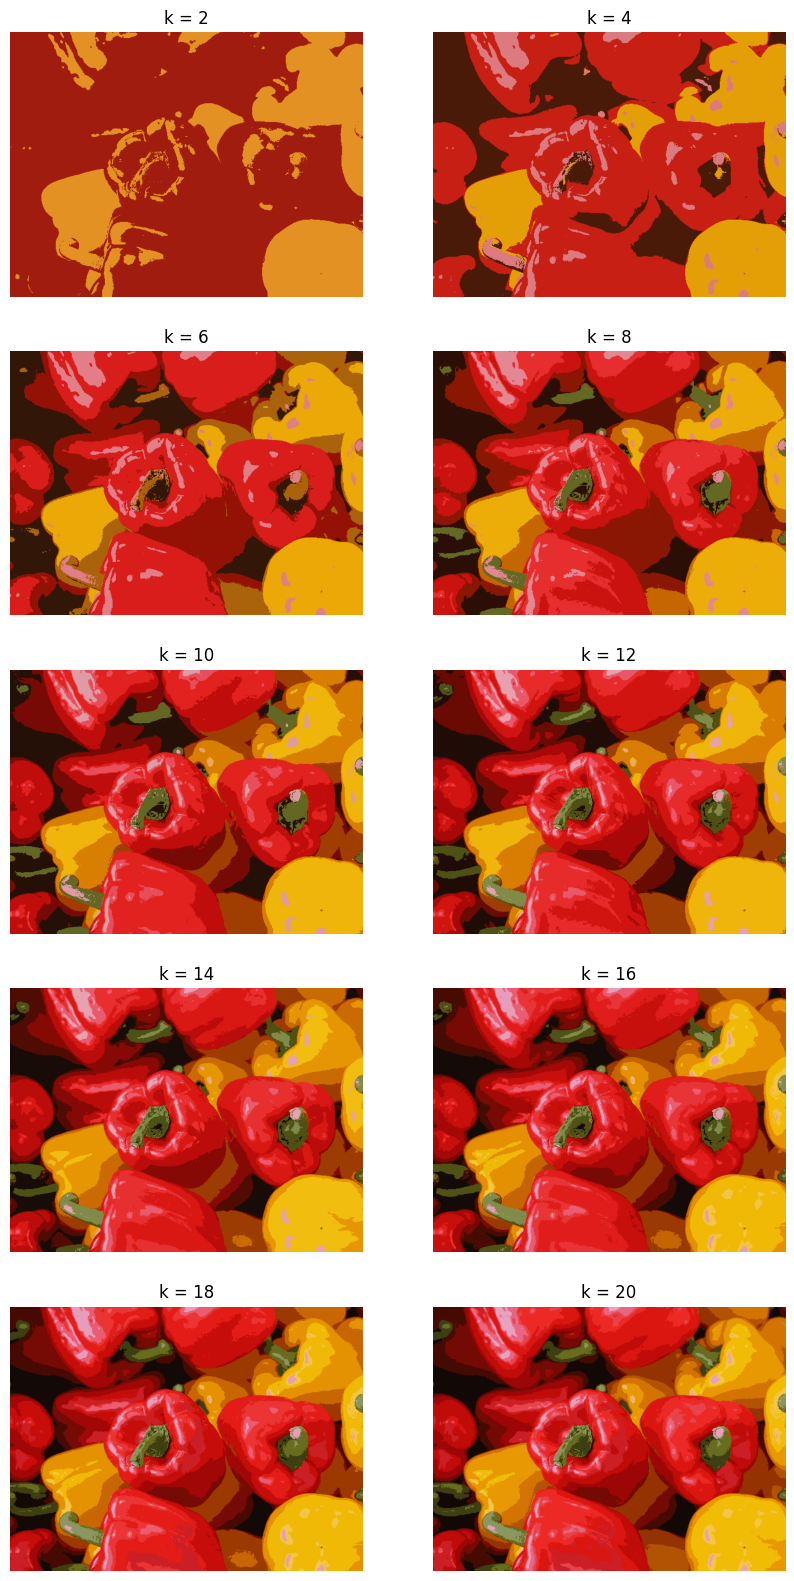

In [23]:
# describimos una lista con los numeros pares 2,4,6,8,...,20
k_vals = list(range(2, 21, 2))

# cremaos una imagen de tamaño 10 x 12
plt.figure(figsize = [10,20])

# realizamos una iteracion sobre la lista [0,1,2,3,...,9]
for i in range(len(k_vals)):

    # vamos a realizar 10 plots en una imagen que se describe como una matriz de tamaño 5x2
    # en esta parte, describimos el i-esimo plot tomando la i-esima imagen de la lista de imagenes
    plt.subplot(5, 2, i+1)
    plt.imshow(img_list[i])

    # describimos el titulo de el i-esimo plot correspondiente
    plt.title('k = ' + str(k_vals[i]))

    # quitamos los ejes de la imagen
    plt.axis('off');
    